In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import imblearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from matplotlib import pyplot

Using TensorFlow backend.


# data exploratory 

In [2]:
raw = pd.read_csv('cgfinal414.csv')

In [3]:
raw = raw.drop(columns='id')

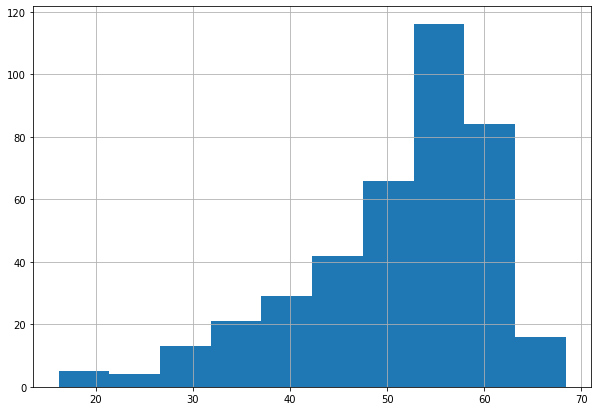

In [4]:
raw['AGG_MENT'].hist(figsize=(10, 7))

In [5]:
raw1 = raw.dropna()

In [6]:
raw1

,StudyArm,Age,Gender,gradecat,incomecat,racecat,Living,relationship_cat,GI_Lung,TTC3,...,ImpairedCom,psychological,ImpairedMS,calcimpairedCom,cgdistress,cggad7,cgphq2,SF12total,AGG_PHYS,AGG_MENT
6,GA,68.0,0.0,3.0,3.0,1.0,1.0,1.0,3.0,2.0,...,1,0,0,0.0,1.0,1.0,0.0,106.520496,59.635147,46.885349
7,GA,69.0,0.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,...,1,0,0,1.0,0.0,0.0,0.0,105.107170,45.895807,59.211363
8,GA,57.0,0.0,2.0,3.0,1.0,2.0,3.0,1.0,2.0,...,0,0,0,0.0,0.0,0.0,0.0,105.878769,55.328368,50.550400
10,GA,71.0,0.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,...,1,0,0,1.0,1.0,0.0,0.0,110.634352,51.428792,59.205560
11,Control,52.0,0.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,...,1,1,0,0.0,1.0,1.0,0.0,104.744417,53.829841,50.914576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,GA,75.0,1.0,3.0,2.0,1.0,1.0,1.0,2.0,2.0,...,1,1,0,1.0,1.0,0.0,0.0,102.702713,58.715992,43.986721
410,GA,71.0,0.0,3.0,2.0,1.0,1.0,1.0,3.0,2.0,...,0,0,0,0.0,1.0,1.0,0.0,87.114771,33.603316,53.511456
411,GA,75.0,0.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,...,1,0,0,1.0,1.0,1.0,1.0,55.783994,15.928499,39.855495
412,GA,67.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,...,1,1,0,1.0,0.0,1.0,0.0,95.192964,47.181300,48.011665


In [7]:
df_cgd=raw1

# one-hot encoding 

In [8]:

one_hot = pd.get_dummies(raw1['StudyArm'])
# Drop column as it is now encoded
df_cgd = df_cgd.drop('StudyArm',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

one_hot = pd.get_dummies(df_cgd['incomecat'],prefix='incomecat')
df_cgd = df_cgd.drop('incomecat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)
df_cgd = df_cgd.drop('incomecat_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['gradecat'],prefix='gradecat')
df_cgd = df_cgd.drop('gradecat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('gradecat_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['relationship_cat'],prefix='relationship_cat')
df_cgd = df_cgd.drop('relationship_cat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('relationship_cat_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['racecat'],prefix='race_cat')
df_cgd = df_cgd.drop('racecat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('race_cat_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['TTC3'],prefix='TTC3')
df_cgd = df_cgd.drop('TTC3',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('TTC3_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['GI_Lung'],prefix='GI_Lung')
df_cgd = df_cgd.drop('GI_Lung',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('GI_Lung_3.0',axis = 1)

In [9]:
raw1=df_cgd

In [10]:
raw1

,Age,Gender,Living,TTC5,TTC6a,TTC6b,TTC6c,TTC6d,distress,ImpairedPolypharmacy,...,gradecat_1.0,gradecat_2.0,relationship_cat_1.0,relationship_cat_2.0,race_cat_1.0,race_cat_2.0,TTC3_1.0,TTC3_2.0,GI_Lung_1.0,GI_Lung_2.0
6,68.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,...,0,0,1,0,1,0,0,1,0,0
7,69.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1,...,0,0,1,0,1,0,0,1,1,0
8,57.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,1,0,0,1,1,0
10,71.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1,...,0,0,1,0,1,0,1,0,1,0
11,52.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0,...,0,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,75.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,1,0,1,0,0,1,0,1
410,71.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,...,0,0,1,0,1,0,0,1,0,0
411,75.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1,...,0,1,1,0,1,0,0,1,1,0
412,67.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1,...,0,1,1,0,1,0,0,1,0,1


In [11]:
raw1['AGG_MENT'].describe()


count    380.000000
mean      51.042885
std        9.880550
min       16.156669
25%       46.036325
50%       54.099347
75%       57.993023
max       68.397655
Name: AGG_MENT, dtype: float64

In [12]:
pd.qcut(raw1['AGG_MENT'],q=[0, .25, 1]).value_counts()

(46.036, 68.398]    285
(16.156, 46.036]     95
Name: AGG_MENT, dtype: int64

In [13]:
pd.cut(raw1['AGG_MENT'],bins=4).value_counts()

(42.277, 55.337]    163
(55.337, 68.398]    147
(29.217, 42.277]     53
(16.104, 29.217]     17
Name: AGG_MENT, dtype: int64

# transfer the agg_ment into catagorial(from regression to classification)

In [14]:

raw1['AGG_MENT_BIN'] = pd.qcut(raw1['AGG_MENT'],q=[0, .25, 1],labels=[1.0,0.0])

In [15]:
raw1[['AGG_MENT','AGG_MENT_BIN']]

,AGG_MENT,AGG_MENT_BIN
6,46.885349,0.0
7,59.211363,0.0
8,50.550400,0.0
10,59.205560,0.0
11,50.914576,0.0
...,...,...
409,43.986721,1.0
410,53.511456,0.0
411,39.855495,1.0
412,48.011665,0.0


In [16]:
raw1['cgphq2']

6      0.0
7      0.0
8      0.0
10     0.0
11     0.0
      ... 
409    0.0
410    0.0
411    1.0
412    0.0
413    0.0
Name: cgphq2, Length: 380, dtype: float64

In [17]:
raw1.columns.values

array(['Age', 'Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c',
       'TTC6d', 'distress', 'ImpairedPolypharmacy', 'cognition',
       'nutrition', 'phy_performance', 'function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'calcimpairedCom', 'cgdistress',
       'cggad7', 'cgphq2', 'SF12total', 'AGG_PHYS', 'AGG_MENT', 'Control',
       'GA', 'incomecat_1.0', 'incomecat_2.0', 'gradecat_1.0',
       'gradecat_2.0', 'relationship_cat_1.0', 'relationship_cat_2.0',
       'race_cat_1.0', 'race_cat_2.0', 'TTC3_1.0', 'TTC3_2.0',
       'GI_Lung_1.0', 'GI_Lung_2.0', 'AGG_MENT_BIN'], dtype=object)

In [18]:
# set X and y variables
X = raw1[['Age', 'Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c',
       'TTC6d', 'distress', 'ImpairedPolypharmacy', 'cognition',
       'nutrition', 'phy_performance', 'function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'calcimpairedCom',  'Control',
       'incomecat_1.0', 'incomecat_2.0', 'gradecat_1.0',
       'gradecat_2.0', 'relationship_cat_1.0', 'relationship_cat_2.0',
       'race_cat_1.0', 'race_cat_2.0', 'TTC3_1.0', 'TTC3_2.0',
       'GI_Lung_1.0', 'GI_Lung_2.0']]
y = raw1['AGG_MENT_BIN']

In [19]:
y = y.astype(float)

In [20]:
y

6      0.0
7      0.0
8      0.0
10     0.0
11     0.0
      ... 
409    1.0
410    0.0
411    1.0
412    0.0
413    0.0
Name: AGG_MENT_BIN, Length: 380, dtype: float64

# train test split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [25]:
X_train.shape
print(sorted(Counter(y_train).items()))

print(sorted(Counter(y_test).items()))

[(0.0, 214), (1.0, 71)]
[(0.0, 71), (1.0, 24)]


In [26]:
X_train.shape
print(sorted(Counter(y_train).items()))

print(sorted(Counter(y_test).items()))

[(0.0, 214), (1.0, 71)]
[(0.0, 71), (1.0, 24)]


In [27]:
X_test.shape

(95, 31)

In [28]:
y_test.shape

(95,)

In [29]:
X_test

,Age,Gender,Living,TTC5,TTC6a,TTC6b,TTC6c,TTC6d,distress,ImpairedPolypharmacy,...,gradecat_1.0,gradecat_2.0,relationship_cat_1.0,relationship_cat_2.0,race_cat_1.0,race_cat_2.0,TTC3_1.0,TTC3_2.0,GI_Lung_1.0,GI_Lung_2.0
82,77.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,1,0,1,0,1,0,0,0
350,84.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,...,0,1,1,0,1,0,0,1,0,1
155,60.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1,...,0,0,0,1,1,0,0,1,0,0
336,52.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0,...,0,1,0,1,1,0,0,1,0,1
370,58.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,40.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0,...,0,0,0,1,1,0,0,1,1,0
184,82.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1,...,0,0,1,0,1,0,0,1,0,0
137,66.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1,...,0,0,1,0,1,0,0,1,0,1
382,76.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1,...,1,0,1,0,1,0,0,1,0,0


In [ ]:
# data shows imbalance 

Text(0.5, 1.0, 'Class Distributions \n (0: Negative || 1: Positive)')

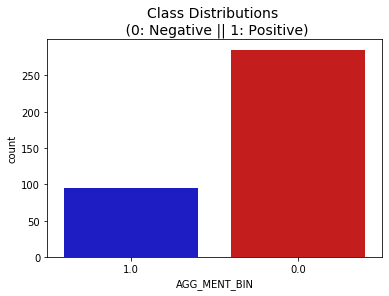

In [30]:
import seaborn as sns
colors = ["#0101DF", "#DF0101"]

sns.countplot('AGG_MENT_BIN', data=raw1, palette=colors)
plt.title('Class Distributions \n (0: Negative || 1: Positive)', fontsize=14)

In [21]:
y.shape

(380,)

In [22]:
print(sorted(Counter(y).items()))

[(0.0, 285), (1.0, 95)]


In [23]:
raw2=X
raw2['AGG_MENT_BIN']=y

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
from imblearn.over_sampling import SMOTE 
from collections import Counter

In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE

from imblearn.over_sampling import KMeansSMOTE
over = SVMSMOTE(random_state=0)

In [26]:

# from imblearn.combine import SMOTETomek
# # smote_tomek = SMOTETomek(random_state=0)

# X_train3,y_train3= smote_tomek.fit_resample(X,y)

# print(sorted(Counter(y_train3).items()))

In [27]:
X.shape

(380, 32)

In [ ]:
# set random state to 42 for consistency 

In [28]:
# from numpy import mean
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.tree import DecisionTreeClassifier

# # define model
# model1 = DecisionTreeClassifier()
# # evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(model1, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))
X = raw1[['Age', 'Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c',
       'TTC6d', 'distress', 'ImpairedPolypharmacy', 'cognition',
       'nutrition', 'phy_performance', 'function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'calcimpairedCom',  'Control',
       'incomecat_1.0', 'incomecat_2.0', 'gradecat_1.0',
       'gradecat_2.0', 'relationship_cat_1.0', 'relationship_cat_2.0',
       'race_cat_1.0', 'race_cat_2.0', 'TTC3_1.0', 'TTC3_2.0',
       'GI_Lung_1.0', 'GI_Lung_2.0']]
y = raw1['AGG_MENT_BIN']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)#####42

# in this variable we skipped the pca process

# LogisticRegression
### setting lgr as baseline model

In [35]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.linear_model import LogisticRegression
# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modelrf = Pipeline([
        ('lgr',  LogisticRegression(random_state=42,class_weight = {0:1,1:(285/95)}))
    ])

param_grid = {

}
# Create a based model

# Instantiate the grid search model
grid_searchlgr = GridSearchCV(estimator = modelrf, param_grid = param_grid,scoring='f1',return_train_score=True,  
                          cv = 5, n_jobs = -1)

In [36]:
grid_searchlgr.fit(X_train, y_train)
grid_searchlgr.best_params_

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{}

In [37]:
grid_searchlgr.best_score_

0.39152255639097744

In [38]:

# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
lgrres = grid_searchlgr.predict(X_test)
CMlgr = confusion_matrix(y_test, lgrres)
print(CMlgr)

[[44 27]
 [16  8]]


In [39]:
# setting threshold
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
lgrres = grid_searchlgr.predict_proba(X_test)
lgrres=(lgrres[:,1]>=0.435).astype(int)
CMlgr = confusion_matrix(y_test, lgrres)
print(CMlgr)

[[37 34]
 [11 13]]


# svc

In [29]:
#setting the hyperparameters for grid search
c=[]
for i in range(-12,12):
    c.append(2**i)
gamma=[]
for j in range(-12,12):
    gamma.append(2**j)
print(c)

[0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]


In [30]:
#class weight set for svc model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)#####42
from sklearn.svm import SVC
modelsvmf1 = Pipeline([
        ('svm',  SVC(random_state=42,probability=True,class_weight = {0:1,1:3.4}))
    ])


# modelsvm = SVC(random_state=42, verbose=2,kernel='rbf')

from sklearn.model_selection import GridSearchCV



param_gridsvmf1 = {'svm__C': c, 

              'svm__gamma': gamma}  
  


svmgridsearchf1 = GridSearchCV(estimator=modelsvmf1, param_grid=param_gridsvmf1, n_jobs=-1, 
                             cv=5, verbose=5, return_train_score=True,scoring="f1")


svmgridsearchf1.fit(X_train, y_train)
svmgridsearchf1.best_score_
svmgridsearchf1.best_params_

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 1836 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:   14.4s finished


{'svm__C': 0.5, 'svm__gamma': 0.00390625}

In [31]:
svmgridsearchf1.best_score_

0.4608147862918752

In [32]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
rfsmotey = svmgridsearchf1.predict(X_test)
CM = confusion_matrix(y_test, rfsmotey)
print(CM)

[[31 40]
 [ 7 17]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.562
svm: ROC AUC=0.627


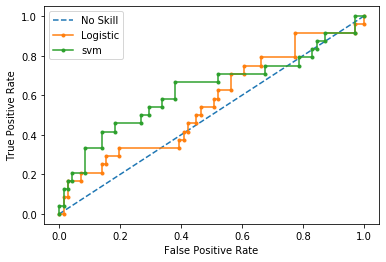

In [40]:
# visualizing roc curve

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probssvm = svmgridsearchf1.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probssvm = lr_probssvm[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
svm_auc = roc_auc_score(y_test, lr_probssvm)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('svm: ROC AUC=%.3f' % (svm_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

svm_fpr, svm_tpr, _ = roc_curve(y_test, lr_probssvm)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='svm')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [44]:
from sklearn.svm import SVC
modelsvmf1 = Pipeline([
        ('svm',  SVC(random_state=42,probability=True,class_weight = {0:1,1:(285/95)}))
    ])


# modelsvm = SVC(random_state=42, verbose=2,kernel='rbf')

from sklearn.model_selection import GridSearchCV



param_gridsvmf1 = {'svm__C': [0.1, 1, 10,20,50, 100,200,500,1000,0.5, 0.1, 0.01, 0.05, 0.001,0.005, 0.0001,0.0005],  
              'svm__gamma': [10,20,50, 100,200,500,1000,1,0.5, 0.1, 0.01, 0.05, 0.001,0.005, 0.0001,0.0005]}  
  


svmgridsearchf1 = GridSearchCV(estimator=modelsvmf1, param_grid=param_gridsvmf1, n_jobs=-1, 
                             cv=5, verbose=5, return_train_score=True,scoring="f1")

svmgridsearchf1.fit(X_train, y_train)
svmgridsearchf1.best_score_

Fitting 5 folds for each of 272 candidates, totalling 1360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 1360 out of 1360 | elapsed:    4.4s finished


0.45168435223313275

In [45]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
svcr = svmgridsearchf1.predict(X_test)
CMsvc = confusion_matrix(y_test, svcr)
print(CMsvc)

[[45 26]
 [10 14]]


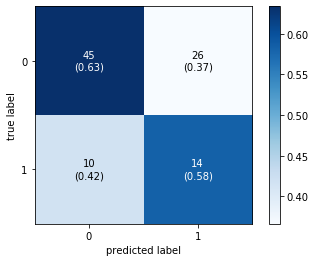

In [46]:
from mlxtend.plotting import plot_confusion_matrix
binary = np.array([[45 ,26],
 [ 10, 14]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.562
svc: ROC AUC=0.612


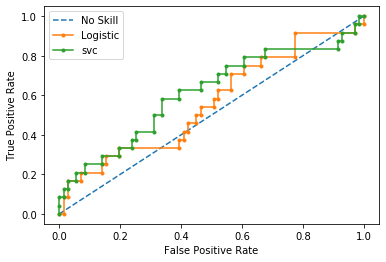

In [54]:
# visualizing roc curve


from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probssvc = svmgridsearchf1.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probssvc = lr_probssvc[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
svc_auc = roc_auc_score(y_test, lr_probssvc)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('svc: ROC AUC=%.3f' % (svc_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

svc_fpr, svc_tpr, _ = roc_curve(y_test, lr_probssvc)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(svc_fpr, svc_tpr, marker='.', label='svc')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# rf

In [426]:
# class weight set
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modelrf = Pipeline([
        ('rf', RandomForestClassifier(random_state=42,class_weight = {0:1,1:(285/95)}))
    ])

param_grid = {
    'rf__max_features': [0.07,0.13, 0.15, 0.25,0.5,0.75,0.9,1,0.2, 0.3,0.4,0.5],
        'rf__n_estimators': [10,25,45, 60,80, 110,148, 200,500],
        'rf__min_samples_split': [0.001,0.007,0.003,0.01,0.1,1],
         'rf__min_samples_leaf': [0.007,0.01,0.1,0.5,0.7,1],
        'rf__bootstrap': [True, False],
        'rf__max_depth': [5,10, 20,40,60,None ]

}
# Create a based model

# Instantiate the grid search model
grid_searchrf = GridSearchCV(estimator = modelrf, param_grid = param_grid,scoring='f1',return_train_score=True,  
                          cv = 5, n_jobs = -1,verbose=5)

In [427]:
grid_searchrf.fit(X_train, y_train)
grid_searchrf.best_params_

Fitting 5 folds for each of 46656 candidates, totalling 233280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 1122 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 1608 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 2202 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 2904 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 3714 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 4632 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 5658 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 6792 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 8034 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 9384 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 10842 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 12408 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 14082 tasks  

{'rf__bootstrap': False,
 'rf__max_depth': 5,
 'rf__max_features': 0.25,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 0.001,
 'rf__n_estimators': 10}

In [428]:
grid_searchrf.best_score_

0.4813239812053854

In [429]:
grid_searchrf.score(X_test,y_test)

0.3333333333333333

In [430]:
rfsmotey = grid_searchrf.predict(X_test)



In [431]:
print(grid_searchrf.best_score_)
from sklearn.metrics import confusion_matrix
rfsmotey = grid_searchrf.predict(X_test)


CM = confusion_matrix(y_test, rfsmotey)
print(CM)

0.4813239812053854
[[60 11]
 [17  7]]


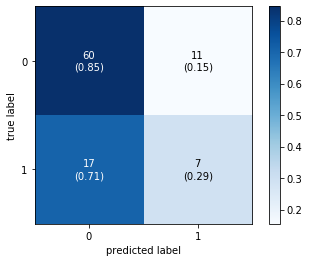

In [447]:
from mlxtend.plotting import plot_confusion_matrix
binary = np.array([[60 ,11],
 [ 17, 7]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [444]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
lgrres = grid_searchrf.predict_proba(X_test)
lgrres=(lgrres[:,1]>=0.35).astype(int)
CMlgr = confusion_matrix(y_test, lgrres)
print(CMlgr)

[[41 30]
 [10 14]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.562
rf: ROC AUC=0.664


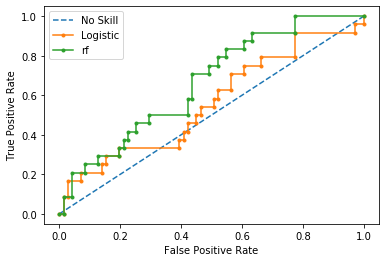

In [437]:
# visualizing roc curve


from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probsrf = grid_searchrf.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probsrf = lr_probsrf[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, lr_probsrf)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('rf: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

rf_fpr, rf_tpr, _ = roc_curve(y_test, lr_probsrf)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='rf')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.562
svc: ROC AUC=0.612
rf: ROC AUC=0.664


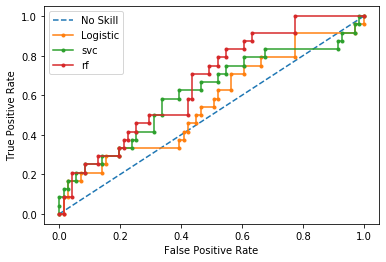

In [438]:
# visualizing roc curve


from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probssvc = svmgridsearchf1.predict_proba(X_test)
lr_probsrf = grid_searchrf.predict_proba(X_test)


# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probssvc = lr_probssvc[:, 1]
lr_probsrf = lr_probsrf[:, 1]


# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
svc_auc = roc_auc_score(y_test, lr_probssvc)
rf_auc = roc_auc_score(y_test, lr_probsrf)


# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('svc: ROC AUC=%.3f' % (svc_auc))
print('rf: ROC AUC=%.3f' % (rf_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

svc_fpr, svc_tpr, _ = roc_curve(y_test, lr_probssvc)
rf_fpr, rf_tpr, _ = roc_curve(y_test, lr_probsrf)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(svc_fpr, svc_tpr, marker='.', label='svc')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='rf')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# gradient boost 

In [33]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.ensemble import GradientBoostingClassifier
# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modelrf = Pipeline([
        ('gb', GradientBoostingClassifier(random_state=42,subsample=0.8))
    ])

param_grid = {
        'gb__learning_rate': [0.1,0.01,1,10],
        'gb__n_estimators': [10,20,25,30,45, 50],
        'gb__min_samples_split': [0.003,0.0025,0.0035,0.001],
        'gb__min_samples_leaf': [0.003,0.0025,0.0035,0.001],
        'gb__max_depth': [5,6,7,8,10],
        
        
}

# Create a based model

# Instantiate the grid search model
grid_searchgb = GridSearchCV(estimator = modelrf, param_grid = param_grid,scoring='f1',return_train_score=True,  
                          cv = 5, n_jobs = -1,verbose=5)

In [34]:
grid_searchgb.fit(X_train, y_train)
grid_searchgb.best_params_


Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 297 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 801 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 1449 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 2241 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 3177 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 4257 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 5481 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done 6849 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 8361 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 9577 out of 9600 | elapsed:  1.2min remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 9600 out of 9600 | elapsed:  1.2min finished


{'gb__learning_rate': 1,
 'gb__max_depth': 10,
 'gb__min_samples_leaf': 0.003,
 'gb__min_samples_split': 0.003,
 'gb__n_estimators': 20}

In [35]:
print(grid_searchgb.best_score_)
print(grid_searchgb.score(X_test,y_test))

0.41174796558939775
0.45


In [36]:
rfsmotey = grid_searchgb.predict(X_test)
CM = confusion_matrix(y_test, rfsmotey)
print(CM)


[[64  7]
 [15  9]]


In [104]:
# setting best threshold 
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve

def get_best_threshold(testy,yhat):
    fpr, tpr, thresholds = roc_curve(testy, yhat)
    # get the best threshold
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))
    return best_thresh



rfrr= grid_searchgb.predict_proba(X_test)
rfrr_thres=get_best_threshold(y_test,rfrr[:,1])
rfrr=(rfrr[:,1]>=0.003).astype(int)
rfrr_cm = confusion_matrix(y_test,rfrr)
print(rfrr_cm)

Best Threshold=0.113045
[[49 22]
 [ 9 15]]


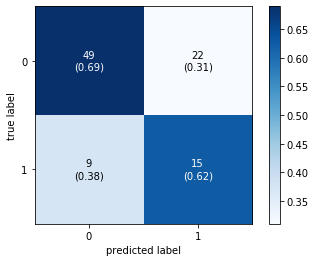

In [105]:
from mlxtend.plotting import plot_confusion_matrix
binary = np.array([[49 ,22],
 [ 9, 15]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.562
gb: ROC AUC=0.691


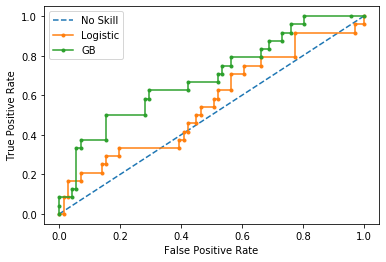

In [53]:
# visualizing roc curve


from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probsgb = grid_searchgb.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probsgb = lr_probsgb[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
gb_auc = roc_auc_score(y_test, lr_probsgb)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('gb: ROC AUC=%.3f' % (gb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

gb_fpr, gb_tpr, _ = roc_curve(y_test, lr_probsgb)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(gb_fpr, gb_tpr, marker='.', label='GB')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.562
svm: ROC AUC=0.627
gb: ROC AUC=0.691


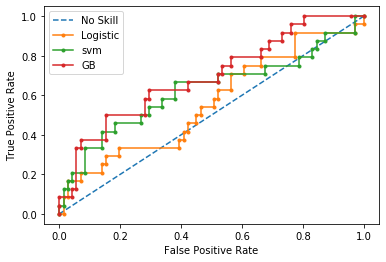

In [96]:
# visualizing roc curve


from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probssvm = svmgridsearchf1.predict_proba(X_test)
lr_probsgb = grid_searchgb.predict_proba(X_test)


# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probssvm = lr_probssvm[:, 1]
lr_probsgb = lr_probsgb[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
svm_auc = roc_auc_score(y_test, lr_probssvm)
gb_auc = roc_auc_score(y_test, lr_probsgb)


# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('svm: ROC AUC=%.3f' % (svm_auc))
print('gb: ROC AUC=%.3f' % (gb_auc))


# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

svm_fpr, svm_tpr, _ = roc_curve(y_test, lr_probssvm)
gb_fpr, gb_tpr, _ = roc_curve(y_test, lr_probsgb)


# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='svm')
pyplot.plot(gb_fpr, gb_tpr, marker='.', label='GB')


# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# RUS
### Random under-sampling integrating in the learning of an AdaBoost classifier.

In [110]:
#setting hyperparameters  
n_est = []
for i in range(25,101):
    n_est.append(i)

n_est.append(200)
n_est.append(400)
    
print(n_est)
lr = []
for j in np.arange(0, 1.1, 0.1):
    lr.append(j)
    
lr.append(0.01)
lr.append(0.03)
lr.append(0.05)
lr.append(0.07)    
print(lr)

[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 200, 400]
[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 0.01, 0.03, 0.05, 0.07]


In [114]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# Create the parameter grid based on the results of random search 
from imblearn.pipeline import Pipeline
modeleb = Pipeline([
        ('rus', RUSBoostClassifier(random_state=42))
    ])

param_gridx = {
        
        'rus__n_estimators': [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 200, 400,600],
        
       
        'rus__sampling_strategy': ['auto'],
        'rus__learning_rate': [0.01, 0.03, 0.05, 0.07, 0.001, 0.003, 0.005, 0.007, 0.1, 0.3, 0.5, 0.7],
        'rus__replacement': [False,True]

}


# Create a based model

# Instantiate the grid search model
grid_searchrus1 = GridSearchCV(estimator = modeleb, param_grid = param_gridx,scoring='f1',return_train_score=True,  
                          cv = 5, n_jobs = -1,verbose=5)
grid_searchrus1.fit(X_train, y_train)
grid_searchrus1.best_params_

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 707 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 905 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 1139 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 1409 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 1715 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 2057 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 2435 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 2849 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3299 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3785 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4307 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4865 tasks      | 

{'rus__learning_rate': 0.005,
 'rus__n_estimators': 400,
 'rus__replacement': False,
 'rus__sampling_strategy': 'auto'}

In [115]:

from sklearn.metrics import confusion_matrix
rfsmotey = grid_searchrus1.predict(X_test)


CM = confusion_matrix(y_test, rfsmotey)
print(CM)

[[44 27]
 [13 11]]


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.562
RUS: ROC AUC=0.586


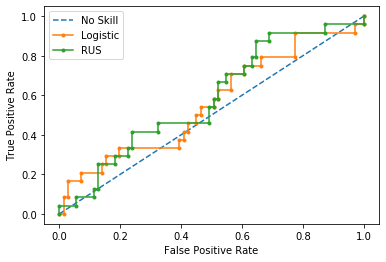

In [116]:
# visualizing roc curve


from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probsrus = grid_searchrus1.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probsrus = lr_probsrus[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rus_auc = roc_auc_score(y_test, lr_probsrus)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('RUS: ROC AUC=%.3f' % (rus_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

rus_fpr, rus_tpr, _ = roc_curve(y_test, lr_probsrus)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(rus_fpr, rus_tpr, marker='.', label='RUS')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.562
svm: ROC AUC=0.627
gb: ROC AUC=0.691
Ada: ROC AUC=0.586


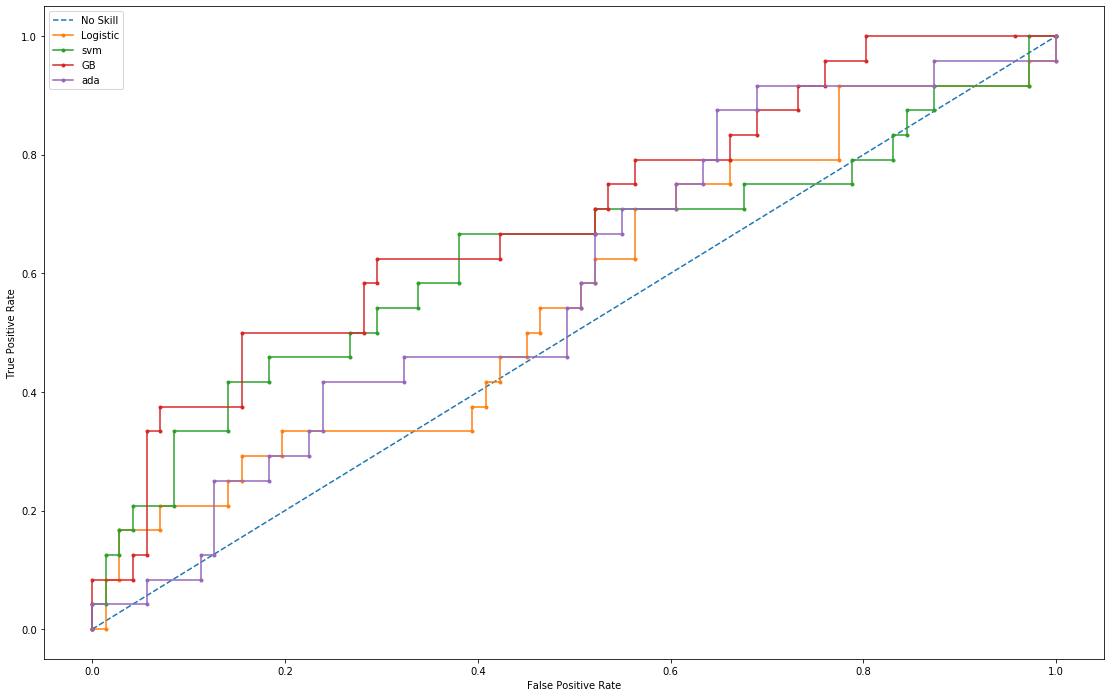

In [118]:
# visualizing roc curve


from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
fig= pyplot.figure(figsize=(19,12))
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = grid_searchlgr.predict_proba(X_test)
lr_probssvm = svmgridsearchf1.predict_proba(X_test)
lr_probsgb = grid_searchgb.predict_proba(X_test)
lr_probsrus = grid_searchrus1.predict_proba(X_test)


# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probssvm = lr_probssvm[:, 1]
lr_probsgb = lr_probsgb[:, 1]
lr_probsrus = lr_probsrus[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
svm_auc = roc_auc_score(y_test, lr_probssvm)
gb_auc = roc_auc_score(y_test, lr_probsgb)
rus_auc = roc_auc_score(y_test, lr_probsrus)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

print('svm: ROC AUC=%.3f' % (svm_auc))
print('gb: ROC AUC=%.3f' % (gb_auc))

print('Ada: ROC AUC=%.3f' % (rus_auc))


# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

svm_fpr, svm_tpr, _ = roc_curve(y_test, lr_probssvm)
gb_fpr, gb_tpr, _ = roc_curve(y_test, lr_probsgb)


rus_fpr, rus_tpr, _ = roc_curve(y_test, lr_probsrus)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='svm')
pyplot.plot(gb_fpr, gb_tpr, marker='.', label='GB')

pyplot.plot(rus_fpr, rus_tpr, marker='.', label='ada')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()